# Gensim word vector visualization of various word vectors

In [167]:
# Each time you (re-start) SageMaker notebook, you need to install gensim, it's not available as part of conda by default
# Be patient! This may take few mins!

#!conda install -y gensim

In [191]:
import os
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# For dimensionality reduction (to plot in 2d or 3d)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

For looking at word vectors, I'll use Gensim. We also use it in hw1 for word vectors. Gensim isn't really a deep learning package. It's a package for for word and text similarity modeling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.

Our homegrown Stanford offering is GloVe word vectors. Gensim doesn't give them first class support, but allows you to convert a file of GloVe vectors into word2vec format. You can download the GloVe vectors from [the Glove page](https://nlp.stanford.edu/projects/glove/). They're inside [this zip file](https://nlp.stanford.edu/data/glove.6B.zip)

(I use the 100d vectors below as a mix between speed and smallness vs. quality. If you try out the 50d vectors, they basically work for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, they're even better than the 100d vectors.)

In [192]:
# If this is the first time you are running this notebook, uncomment the following lines and run this cell
# Be patient! This may take few mins!

#!wget https://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

In [193]:
glove_file = datapath(os.path.join(os.getcwd(),'glove.6B.100d.txt'))
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [194]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [195]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.9272854328155518),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875634074211121),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930225372314),
 ('kerry', 0.7472623586654663)]

In [196]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.629442036151886),
 ('papaya', 0.6246591210365295)]

In [197]:
model.most_similar(negative='banana')

[('keyrates', 0.7173939347267151),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720293998718),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434808731079),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905654072761536),
 ('maurilio', 0.6865653395652771)]

In [199]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


![Analogy](./imgs/word2vec-king-queen-composition.png)

In [200]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [201]:
analogy('king', 'queen', 'man')

'woman'

In [202]:
analogy('japan', 'japanese', 'australia')

'australian'

In [203]:
analogy('australia', 'beer', 'france')

'champagne'

In [204]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [205]:
analogy('tall', 'tallest', 'long')

'longest'

In [206]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [207]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [236]:
words = ['queen', 'king', 'man', 'woman', 'boy', 'girl','coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china', 'england',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute']

In [237]:
word_vectors = np.array([model[w] for w in words])

In [238]:
def two_dim(word_vectors, method='tsne'):
    if method == 'pca':
        return PCA().fit_transform(word_vectors)[:,:2]
    elif method == 'tsne':
        return TSNE(perplexity=5, n_components=2, init='pca', n_iter=3500, random_state=32).fit_transform(word_vectors)[:,:2]
    else:
        raise ValueError('Method %s is not supported. Supported methods are tsne and pca!')

def display_scatterplot(words, word_vectors, method='tsne'):
    
    x_y = two_dim(word_vectors, method)

    plt.figure(figsize=(20,20))
    plt.scatter(x_y[:,0], x_y[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, x_y):
        plt.text(x+0.05, y+0.05, word)

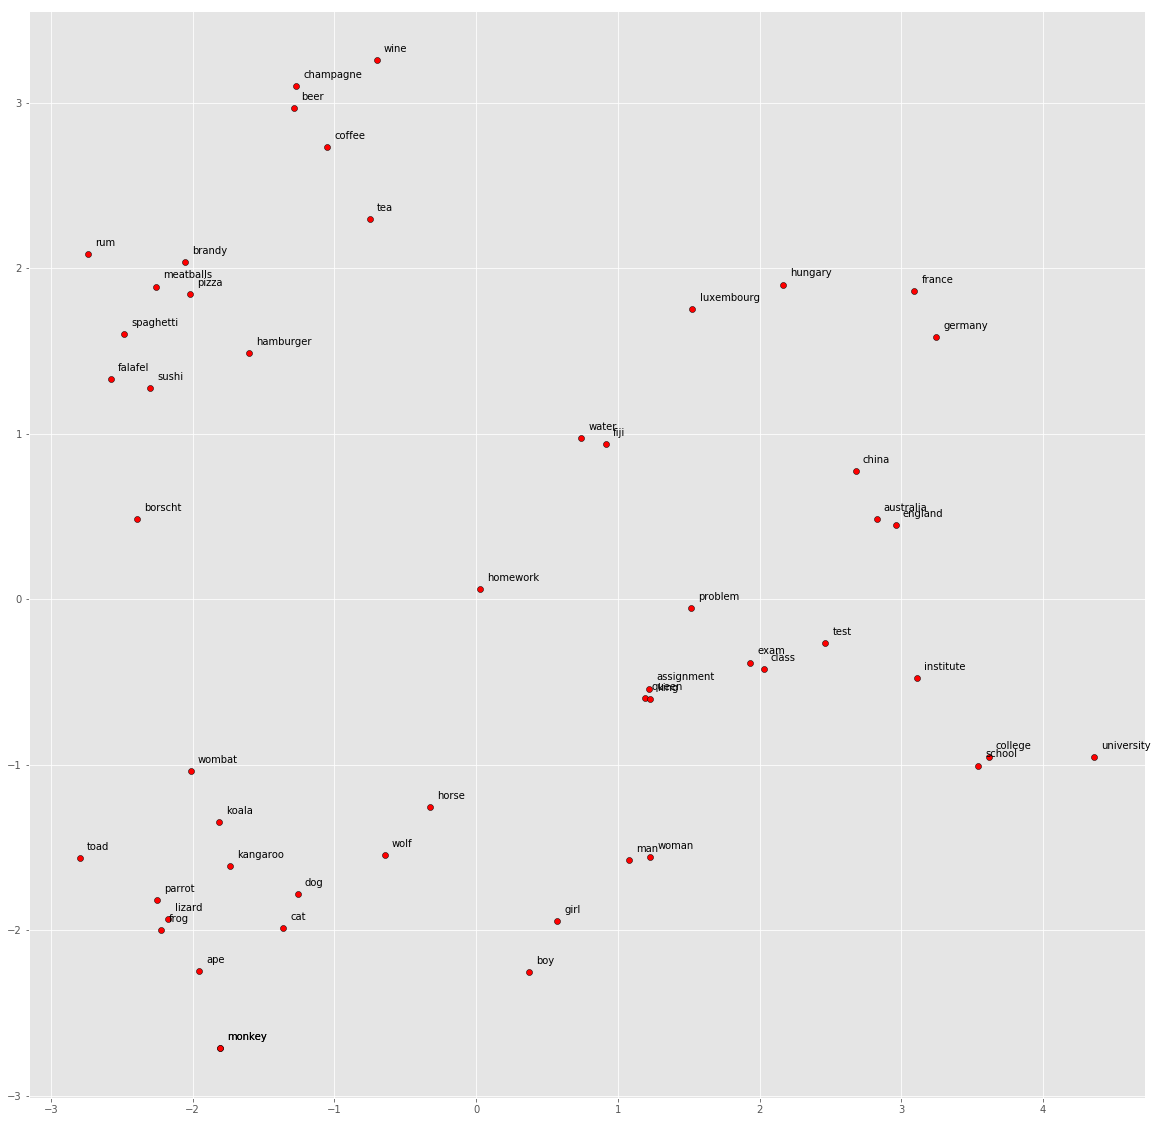

In [239]:
display_scatterplot(words, word_vectors, method='pca')

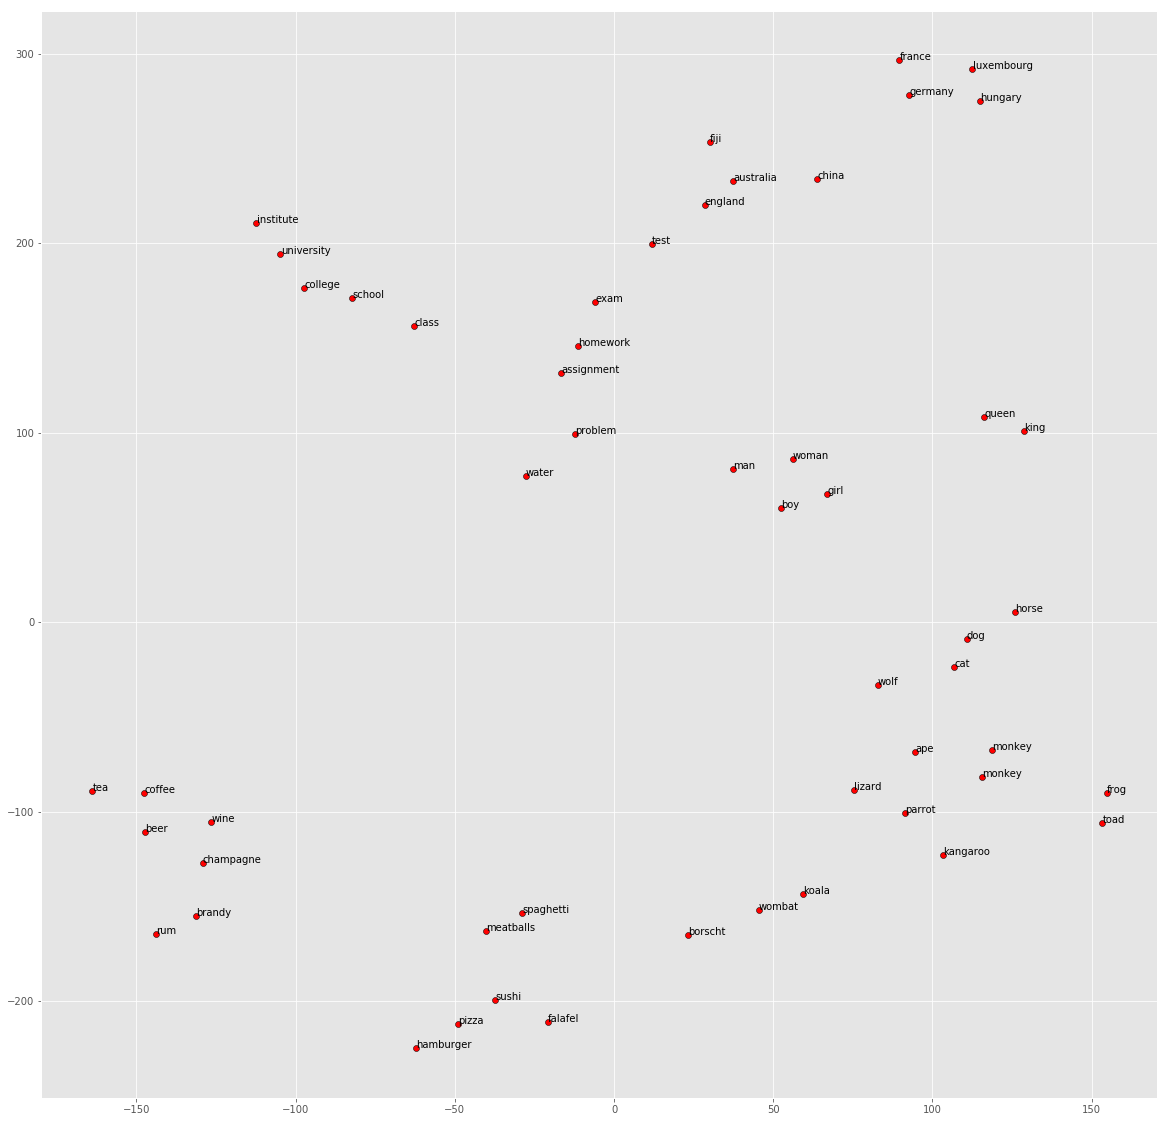

In [240]:
display_scatterplot(words, word_vectors, method='tsne')

638.1872311785312
10


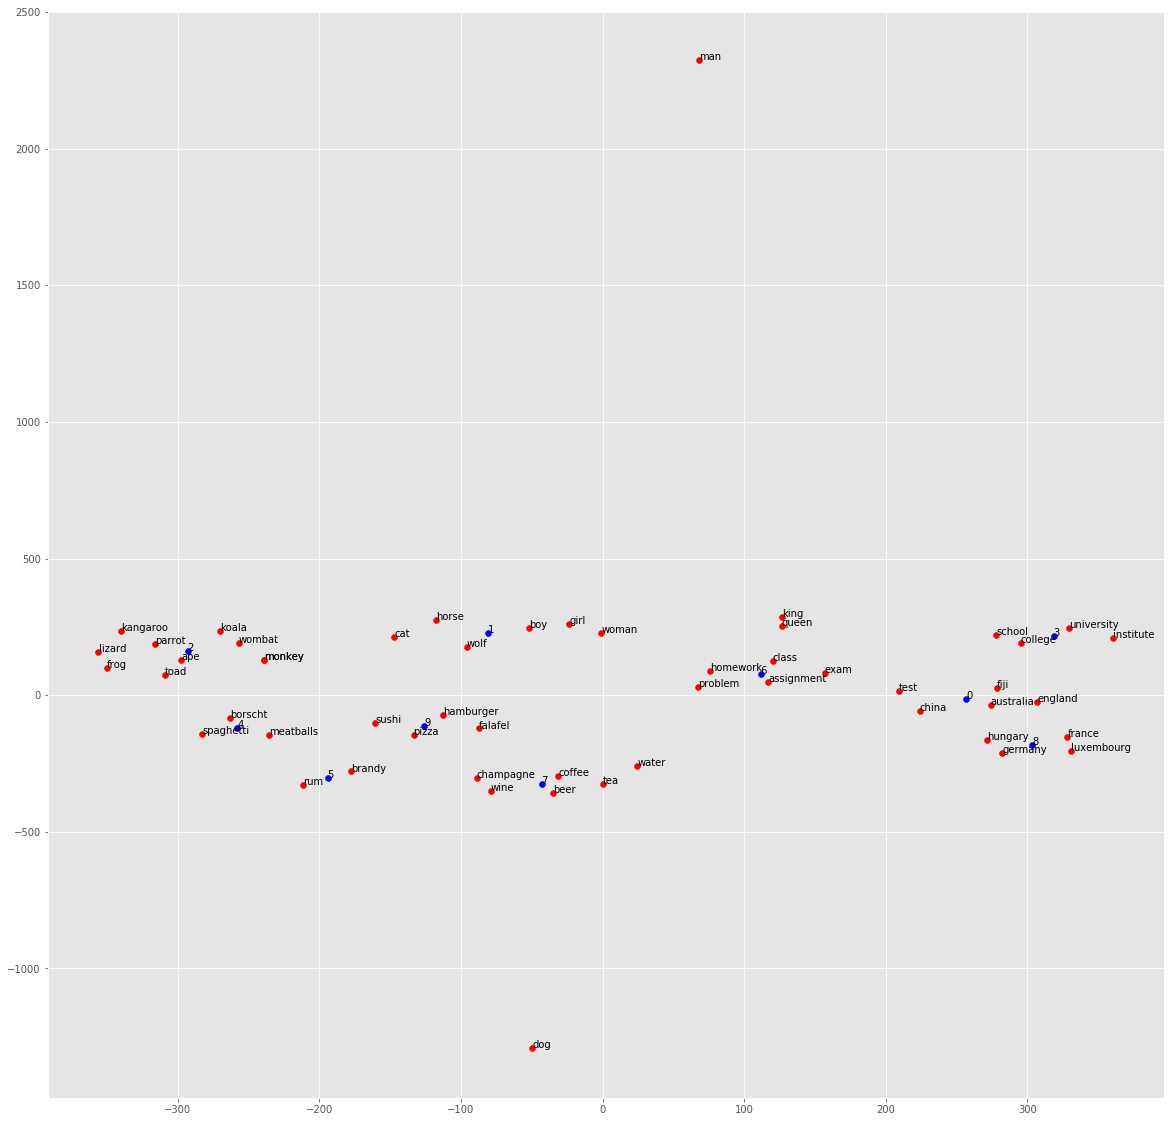

In [244]:
from sklearn.cluster import KMeans

def cluster(word_vectors, n_clusters=10):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=13000, n_init=10, random_state=0)
    kmeans.fit_transform(word_vectors)
    print(kmeans.inertia_)
    return kmeans.cluster_centers_

def display_scatterplot(words, word_vectors, clusters=None, method='tsne'):
    
    if clusters is None:
        clusters = np.empty(word_vectors[0].shape)
    
    x_y = two_dim(np.concatenate((word_vectors, clusters)), method)
    
    n_clusters = len(clusters)
    print(n_clusters)

    plt.figure(figsize=(20,20))
    plt.scatter(x_y[:-n_clusters,0], x_y[:-n_clusters,1], edgecolors='red', c='red')
    plt.scatter(x_y[-n_clusters:,0], x_y[-n_clusters:,1], edgecolors='blue', c='blue')

    for word, (x,y) in zip(words, x_y):
        plt.text(x+0.05, y+0.05, word)
    
    for i, (x,y) in enumerate(x_y[-n_clusters:,]):
        plt.text(x+0.05, y+0.05, i)

display_scatterplot(words, word_vectors, clusters=cluster(word_vectors), method='tsne')

In [ ]:
def embed(word):
    try:
        return model[word]
    except:
        return model['the']

words = "Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago.[21] European colonization began in the 16th century. The United States emerged from the thirteen British colonies established along the East Coast. Numerous disputes between Great Britain and the colonies led to the American Revolutionary War lasting between 1775 and 1783, leading to independence.[22] The United States embarked on a vigorous expansion across North America throughout the 19th century—gradually acquiring new territories,[23] displacing Native Americans, and admitting new states—until by 1848 it spanned the continent.[23] During the second half of the 19th century, the American Civil War led to the abolition of slavery in the United States.[24][25] The Spanish–American War and World War I confirmed the country's status as a global military power.Over time, indigenous cultures in North America grew increasingly complex, and some, such as the pre-Columbian Mississippian culture in the southeast, developed advanced agriculture, grand architecture, and state-level societies.[56] The Mississippian culture flourished in the south from 800 to 1600 AD, extending from the Mexican border down through Florida.[57] Its city state Cahokia is considered the largest, most complex pre-Columbian archaeological site in the modern-day United States.[58] In the Four Corners region, Ancestral Puebloans culture developed as the culmination of centuries of agricultural experimentation, which produced greater dependence on farming.[59] Three UNESCO World Heritage Sites in the United States are credited to the Pueblos: Mesa Verde National Park, Chaco Culture National Historical Park, and Taos Pueblo.[60][61] The earthworks constructed by Native Americans of the Poverty Point culture in northeastern Louisiana have also been designated a UNESCO World Heritage site. In the southern Great Lakes region, the Iroquois Confederacy (Haudenosaunee) was established at some point between the twelfth and fifteenth centuries.[62]The date of the first settlements of the Hawaiian Islands is a topic of continuing debate.[63] Archaeological evidence seems to indicate a settlement as early as 124 AD.[64] ".lower().split()
word_vectors = np.array([embed(w) for w in words])


display_scatterplot(words, word_vectors, clusters=cluster(word_vectors), method='tsne')